In [2]:
import numpy as np
import matplotlib.pyplot as plt

wall_stddevs = np.loadtxt("/home/brano/Projects/github_indoor++/pcds/error_measurements/deviations_by_laser_averaged/wall.txt")
floor_stddevs = np.loadtxt("/home/brano/Projects/github_indoor++/pcds/error_measurements/deviations_by_laser_averaged/floor.txt")


In [3]:
laser_id_to_angle = {
    0: -15,
    1: 1,
    2: -13,
    3: 3,
    4: -11,
    5: 5,
    6: -9,
    7: 7,
    8: -7,
    9: 9,
    10: -5,
    11: 11,
    12: -3,
    13: 13,
    14: -1,
    15: 15
}
laser_angle_to_id = {y:x for x,y in laser_id_to_angle.items()}
sorted_angles_asc = sorted(laser_angle_to_id.keys())
sorted_ids_by_angle = [laser_angle_to_id[angle] for angle in sorted_angles_asc]


In [4]:
wall_stddevs

array([[0.00945079, 0.01000707, 0.00904427, 0.0104084 , 0.00906367,
        0.01019636, 0.00941505, 0.01146727, 0.01004323, 0.01027624,
        0.00950521, 0.01099278, 0.00983575, 0.01100237, 0.00989802,
        0.01130249],
       [0.00833743, 0.00844385, 0.00874048, 0.0087824 , 0.0083232 ,
        0.00900897, 0.00872528, 0.00992566, 0.01013095, 0.01030538,
        0.00921781, 0.0102852 , 0.00904762, 0.01219389, 0.00925696,
        0.01419983],
       [0.00862083, 0.00874237, 0.00903505, 0.00878214, 0.00812785,
        0.00891988, 0.00858012, 0.00942199, 0.01006   , 0.00984419,
        0.00903419, 0.01033703, 0.00894632, 0.01012752, 0.00985601,
        0.01028993],
       [0.00851419, 0.00894146, 0.00844567, 0.0087837 , 0.00814625,
        0.00935904, 0.00851675, 0.00991166, 0.01077794, 0.00978706,
        0.00856255, 0.00972768, 0.00931384, 0.01081605, 0.00902558,
        0.01056724],
       [0.00899065, 0.00952837, 0.00824047, 0.00923926, 0.00958051,
        0.00926102, 0.01121061, 

In [5]:
sorted_ids_by_angle

[0, 2, 4, 6, 8, 10, 12, 14, 1, 3, 5, 7, 9, 11, 13, 15]

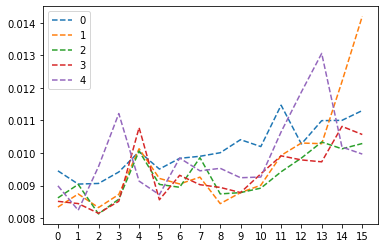

In [6]:
for dist in wall_stddevs:
    plt.plot(range(16), dist[sorted_ids_by_angle], "--")
plt.xticks(range(16))
plt.legend(range(5))
plt.show()

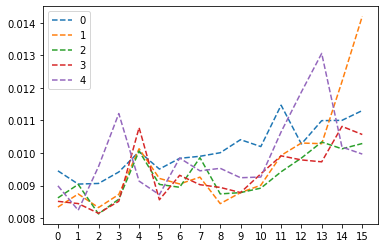

In [7]:
for dist in wall_stddevs:
    plt.plot(range(16), dist[sorted_ids_by_angle], "--")
plt.xticks(range(16))
plt.legend(range(5))
plt.show()

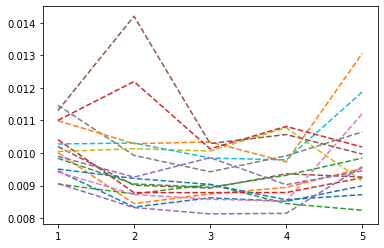

In [8]:
for laser in wall_stddevs.T:
    plt.plot(range(1, 6), laser, "--")
plt.xticks(range(1, 6))
plt.show()

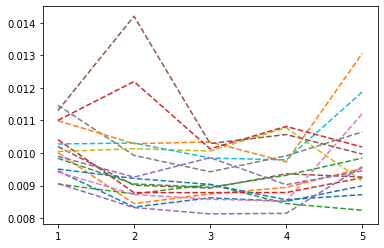

In [9]:
for laser in wall_stddevs.T:
    plt.plot(range(1, 6), laser, "--")
plt.xticks(range(1, 6))
plt.show()

[0.00950521 0.00921781 0.00903419 0.00856255 0.00871875]


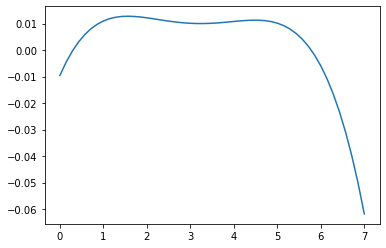

In [25]:
x = range(1, 6)
y = wall_stddevs.T[13]

fit = np.polyfit(x, y, 4)
f = np.poly1d(fit)
print(wall_stddevs.T[10])

# calculate new x's and y's
x_new = np.linspace(0, 7, 50)
y_new = f(x_new)
plt.plot(x_new, y_new)
# plt.xlim([x[0]-1, x[-1] + 1 ])
plt.show()

In [11]:
def make_polynomials():
    result = np.zeros([16, 5])
    for i in range(16):
        x = range(1, 6)
        y = wall_stddevs.T[i]
        coeffs = np.polyfit(x, y, 4)
        result[i, :] = coeffs
#     np.savetxt("floor_polynomials.txt", result)
    return result


In [12]:
res = make_polynomials()

In [30]:
laser_id = 13
distance = 5.0
poly = np.poly1d(res[laser_id])
if distance < 1.0:
    distance = 1.0
elif distance > 5.0:
    distance = 5.0
sampled_sigma = poly(distance)
sampled_sigma

0.01018127962831441

TypeError: 'numpy.ndarray' object is not callable